In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np,pandas as pd,seaborn,datetime,os
import matplotlib.pyplot as vsap
import matplotlib as mpvs
import plotly.express as pxids 

from sklearn.pipeline import make_pipeline
from sklearn import preprocessing, utils,metrics,pipeline,feature_selection, model_selection, decomposition
from sklearn import tree, linear_model,svm, ensemble, neural_network

import visualkeras
from PIL import ImageFont
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.utils import to_categorical
import os

## Data Reading

In [2]:
def ReadAPA():
    apa=pd.read_csv("APA-DDoS-Dataset.csv")
    print("Total Records of Data: {}".format(apa.shape[0]))
    print("Total Features of Data: {}".format(apa.shape[1]))
    return apa

In [3]:
APADT=ReadAPA()
APADT.head()

Total Records of Data: 151200
Total Features of Data: 23


,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK


## Data Cleaning

In [4]:
def CleanAPA(apa):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("                    Data Feature Information\n")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(apa.info())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("Missing Values (Before Cleaning): ",sum(apa.isna().sum()))
    if sum(apa.isna().sum())>0:
        apa=apa.dropna()
    print("Missing Values (After Cleaning): ",sum(apa.isna().sum()))
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    return apa
APADT=CleanAPA(APADT)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                    Data Feature Information

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip.src           151200 non-null  object
 1   ip.dst           151200 non-null  object
 2   tcp.srcport      151200 non-null  int64 
 3   tcp.dstport      151200 non-null  int64 
 4   ip.proto         151200 non-null  int64 
 5   frame.len        151200 non-null  int64 
 6   tcp.flags.syn    151200 non-null  int64 
 7   tcp.flags.reset  151200 non-null  int64 
 8   tcp.flags.push   151200 non-null  int64 
 9   tcp.flags.ack    151200 non-null  int64 
 10  ip.flags.mf      151200 non-null  int64 
 11  ip.flags.df      151200 non-null  int64 
 12  ip.flags.rb      151200 non-null  int64 
 13  tcp.seq          151200 no

## Data Visualization

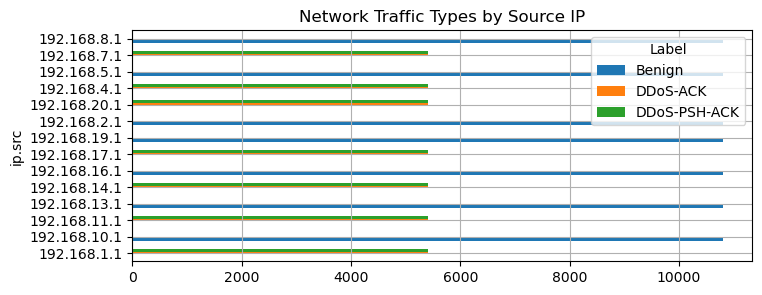

In [5]:
pd.crosstab(APADT['ip.src'],APADT['Label']).plot(kind='barh', 
                                                       title="Network Traffic Types by Source IP", figsize=(8,3))
vsap.grid()
vsap.show()

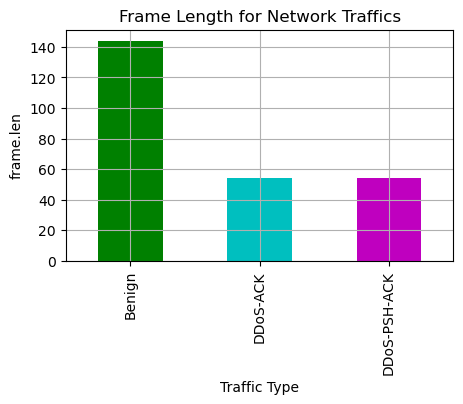

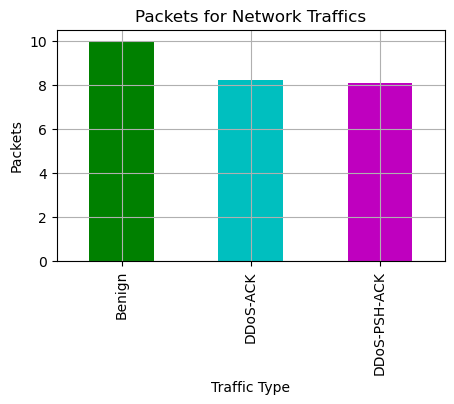

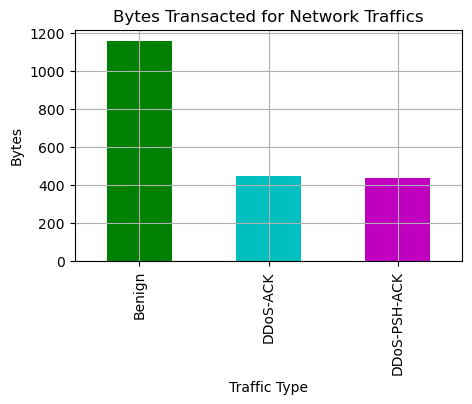

In [6]:
apaft=['frame.len','Packets','Bytes']
apanmft=['Frame Length','Packets','Bytes Transacted']
for c in range(len(apaft)):
    APADT.groupby('Label').mean('{}'.format(apaft[c]))['{}'.format(apaft[c])].plot(
        kind='bar',figsize=(5,3), color=['g','c','m'], title="{} for Network Traffics".format(apanmft[c]))
    vsap.ylabel('{}'.format(apaft[c]))
    vsap.xlabel('Traffic Type')
    vsap.grid()
    vsap.show()

## Feature Engineering

### Feature Encoding

In [7]:
def EncodeAttr(dt):
    apa=dt.copy()
    apa=apa.drop(['frame.time','Label'],axis=1)
    lbapa=dt['Label']
    apa_cts=apa.dtypes[apa.dtypes=='object'].index.tolist()
    print("Detected Object Type Features: \n", *apa_cts, sep="\n")
    if len(apa_cts)==0:
        print("Object Type Features Detected in the Data!!")
        apa['Label']=lbapa
        return apa
    else:
        print("All Object Types Features Encoded in the Data")
        for c in range(len(apa_cts)):
            apa[apa_cts[c]]=apa[apa_cts[c]].replace(apa[apa_cts[c]].unique(),[i+1 for i in range(len(apa[apa_cts[c]].unique()))])
        apa['Label']=lbapa
        return apa
Enc_APADT=EncodeAttr(APADT)
Enc_APADT.head()

Detected Object Type Features: 

ip.src
ip.dst
All Object Types Features Encoded in the Data


,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,ip.flags.rb,tcp.seq,tcp.ack,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,1,1,2412,8000,6,54,0,0,1,1,...,0,1,1,8,432,4,216,4,216,DDoS-PSH-ACK
1,1,1,2413,8000,6,54,0,0,1,1,...,0,1,1,10,540,5,270,5,270,DDoS-PSH-ACK
2,1,1,2414,8000,6,54,0,0,1,1,...,0,1,1,12,648,6,324,6,324,DDoS-PSH-ACK
3,1,1,2415,8000,6,54,0,0,1,1,...,0,1,1,10,540,5,270,5,270,DDoS-PSH-ACK
4,1,1,2416,8000,6,54,0,0,1,1,...,0,1,1,6,324,3,162,3,162,DDoS-PSH-ACK


### Outlier Treatement

In [8]:
def OutlierChecking(apa,n,col,tx):      
    arrapa=np.array(apa) 
    pcapa = decomposition.PCA(n_components=n) 
    pcapa.fit(arrapa) 
    pcapacm=["Comp-{}".format(i+1) for i in range(len(pcapa.explained_variance_ratio_.tolist()))]
    vsap.figure(figsize=(4,2))  
    vsap.title("{} Normalization\nMaximum Variance: {}".format(tx,round(max(pcapa.explained_variance_ratio_),5)),fontsize=18)
    vsap.bar(pcapacm,pcapa.explained_variance_ratio_.tolist(),width=0.5,color=col) 
    vsap.xlabel("PCA",fontsize=14)
    vsap.ylabel("Variance",fontsize=14)
    vsap.grid()
    vsap.show()
    return pcapa.explained_variance_ratio_

def DataScaling(apa): 
    ppc = preprocessing.MinMaxScaler() 
    nrmapa=ppc.fit_transform(apa) 
    return nrmapa 

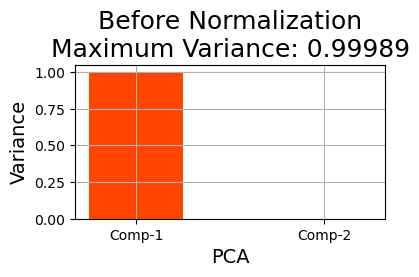

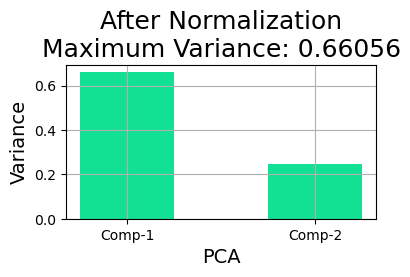

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,ip.flags.rb,tcp.seq,tcp.ack,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,0.0,0.0,0.018594,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.368421,0.321702,0.333333,0.319527,0.4,0.323353,DDoS-PSH-ACK
1,0.0,0.0,0.018611,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.473684,0.413617,0.444444,0.426036,0.5,0.404192,DDoS-PSH-ACK
2,0.0,0.0,0.018628,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.578947,0.505532,0.555556,0.532544,0.6,0.485030,DDoS-PSH-ACK
3,0.0,0.0,0.018644,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.473684,0.413617,0.444444,0.426036,0.5,0.404192,DDoS-PSH-ACK
4,0.0,0.0,0.018661,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.263158,0.229787,0.222222,0.213018,0.3,0.242515,DDoS-PSH-ACK


In [9]:
outapa=[]
Enc_APADT = Enc_APADT.replace([np.inf, -np.inf], np.finfo('float32').max)
outapa.append(OutlierChecking(Enc_APADT.drop('Label',axis=1),2,"#FF4500","Before"))

fledt=[] 
apapca_flag=[]  
for rp in outapa: 
    for r in rp:
        if r>0.7:
            apapca_flag.append(True)
if len(apapca_flag)==1 and True in apapca_flag:
    APA_Norm=DataScaling(Enc_APADT.drop('Label',axis=1))    
APA_Norm=pd.DataFrame(APA_Norm,columns=Enc_APADT.drop('Label',axis=1).columns.tolist())     
APA_Norm['Label']=Enc_APADT['Label']

OutlierChecking(APA_Norm.drop('Label',axis=1),2,"#12E193","After")
APA_Norm.head()

### Hybrid Feature Selection By Combining RFE and Chi-Sq

In [10]:
def FetRFE(apa):
    print("--------------------------------------------------------------")
    print("Feature Selection for the Data using RFE")
    print("--------------------------------------------------------------")
    Xapa=apa.drop([apa.columns.tolist()[-1]],axis=1)
    Yapa=apa[apa.columns.tolist()[-1]]
    Yapa=Yapa.replace(Yapa.unique(),[x for x in range(len(Yapa.unique()))]) 
    rfe_apa = feature_selection.RFE(estimator=linear_model.LogisticRegression(),n_features_to_select = int(len(apa.columns)*0.7), step = 0.7)
    rfe_trnd=rfe_apa.fit(Xapa,Yapa)
    print("RFE Selected Features: \n",*Xapa.columns[rfe_trnd.get_support()],sep="\n")
    print("--------------------------------------------------------------")
    return Xapa.columns[rfe_trnd.get_support()] 

In [11]:
def FetChisq(apa):   
    print("--------------------------------------------------------------")
    print("Feature Selection for the Data using Chi-Squred")
    print("--------------------------------------------------------------")
    Xapa=apa.drop([apa.columns.tolist()[-1]],axis=1)   
    Yapa=apa[apa.columns.tolist()[-1]] 
    Yapa=Yapa.replace(Yapa.unique(),[x for x in range(len(Yapa.unique()))]) 
    chi_apa=feature_selection.SelectKBest(feature_selection.chi2, k=int(len(apa.columns)*0.7))
    chi_apa.fit(Xapa, Yapa) 
    print("Chi-Squared Selected Features: \n",*Xapa.columns[chi_apa.get_support()],sep="\n")
    print("--------------------------------------------------------------")
    return Xapa.columns[chi_apa.get_support()]

In [12]:
ApaFets=[]  
ftc=FetChisq(APA_Norm) 
ftr=FetRFE(APA_Norm) 
for x in ftc:   
    if x in ftr:   
        ApaFets.append(x) 

--------------------------------------------------------------
Feature Selection for the Data using Chi-Squred
--------------------------------------------------------------
Chi-Squared Selected Features: 

ip.src
tcp.srcport
frame.len
tcp.flags.push
ip.flags.mf
ip.flags.df
ip.flags.rb
tcp.seq
tcp.ack
Packets
Bytes
Tx Packets
Tx Bytes
Rx Packets
Rx Bytes
--------------------------------------------------------------
--------------------------------------------------------------
Feature Selection for the Data using RFE
--------------------------------------------------------------
RFE Selected Features: 

ip.src
tcp.srcport
frame.len
tcp.flags.push
tcp.flags.ack
ip.flags.df
ip.flags.rb
tcp.seq
tcp.ack
Packets
Bytes
Tx Packets
Tx Bytes
Rx Packets
Rx Bytes
--------------------------------------------------------------


In [13]:
print("\nSelected Features Using Hybrid Technique: \n")
print(*ApaFets, sep="\n")


Selected Features Using Hybrid Technique: 

ip.src
tcp.srcport
frame.len
tcp.flags.push
ip.flags.df
ip.flags.rb
tcp.seq
tcp.ack
Packets
Bytes
Tx Packets
Tx Bytes
Rx Packets
Rx Bytes


## Data Preparation

### Preparing Predictor and Target Data

In [14]:
Predictor=APA_Norm[ApaFets]
Predictor.head()

,ip.src,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,ip.flags.rb,tcp.seq,tcp.ack,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes
0,0.0,0.018594,0.0,1.0,0.0,0.0,0.0,0.0,0.368421,0.321702,0.333333,0.319527,0.4,0.323353
1,0.0,0.018611,0.0,1.0,0.0,0.0,0.0,0.0,0.473684,0.413617,0.444444,0.426036,0.5,0.404192
2,0.0,0.018628,0.0,1.0,0.0,0.0,0.0,0.0,0.578947,0.505532,0.555556,0.532544,0.6,0.485030
3,0.0,0.018644,0.0,1.0,0.0,0.0,0.0,0.0,0.473684,0.413617,0.444444,0.426036,0.5,0.404192
4,0.0,0.018661,0.0,1.0,0.0,0.0,0.0,0.0,0.263158,0.229787,0.222222,0.213018,0.3,0.242515


In [15]:
Target=APA_Norm['Label']
print(Target.value_counts())

Label
Benign          75600
DDoS-PSH-ACK    37800
DDoS-ACK        37800
Name: count, dtype: int64


### Data Split

In [16]:
def SegData(PredDt, TgrDt):
    TrnDDSX,TstDDSX,TrnDDSy,TstDDSy=model_selection.train_test_split(PredDt,TgrDt, test_size=0.25, random_state=0) 
    print("Test Class Distribution: ",TstDDSy.value_counts(),"\n")
    print("Training Class Distribution: ",TrnDDSy.value_counts())
    return TrnDDSX,TstDDSX,TrnDDSy,TstDDSy
TrnDDSX,TstDDSX,TrnDDSy,TstDDSy=SegData(Predictor, Target)

Test Class Distribution:  Label
Benign          18968
DDoS-ACK         9501
DDoS-PSH-ACK     9331
Name: count, dtype: int64 

Training Class Distribution:  Label
Benign          56632
DDoS-PSH-ACK    28469
DDoS-ACK        28299
Name: count, dtype: int64


## Assigning Algorithms

In [2]:
ClfDDS=[  
        ensemble.RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=11,min_weight_fraction_leaf=0.45,max_features='log2'),
        linear_model.LogisticRegression(tol=0.06, C=0.01,max_iter=2,solver='liblinear',fit_intercept=False), 
        neural_network.MLPClassifier(hidden_layer_sizes=(2,1,), learning_rate_init=0.001, power_t=0.7,max_fun=3,max_iter=4),
        make_pipeline(preprocessing.StandardScaler(),svm.SVC(C=0.2, kernel='sigmoid', degree=3,tol=0.01,max_iter=20))
]
Clfs=[
      "Random Forest",
      "Logistic Regression",
      "MLP Classifier",
      "SVC"
]

In [3]:
ClfDDS[0]

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_weight_fraction_leaf=0.45, n_estimators=10)

In [4]:
ClfDDS[1]

LogisticRegression(C=0.01, fit_intercept=False, max_iter=2, solver='liblinear',
                   tol=0.06)

In [5]:
ClfDDS[2]

MLPClassifier(hidden_layer_sizes=(2, 1), max_fun=3, max_iter=4, power_t=0.7)

In [6]:
ClfDDS[3]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.2, kernel='sigmoid', max_iter=20, tol=0.01))])

## DDoS Detection

In [22]:
def ConfMatVs(yAct,yPreds,ModelDDS):
    CLSS=np.unique(np.array(yAct))
    ids_cnf=pd.crosstab(yAct,yPreds,rownames=['True'], colnames=['Predicted'], margins=True)
    vsap.figure(figsize=(5,3))
    vsap.title("{}".format(ModelDDS), fontsize=16,color="m")
    seaborn.heatmap(ids_cnf.iloc[:len(CLSS),:len(CLSS)],fmt="d",annot=True,cmap="plasma")
    vsap.show()
    return ids_cnf

                        DDoS Intrusion Detection
                         Random Forest 
Training Time: 0.352 Seconds
Training Time: 0.02 Seconds
Train Accuracy:  75.045
Test Accuracy:  74.86500000000001


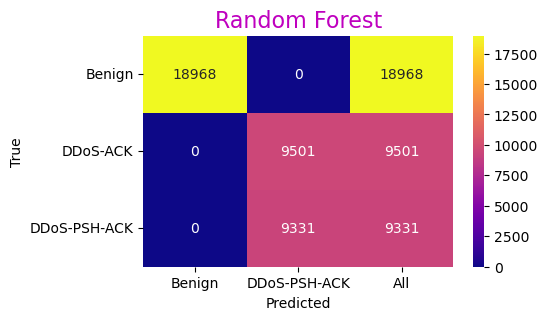

______________________________________________________________
_________________ Classification report for __________________
_________________ Random Forest ______________
______________________________________________________________
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     18968
    DDoS-ACK       0.00      0.00      0.00      9501
DDoS-PSH-ACK       0.50      1.00      0.66      9331

    accuracy                           0.75     37800
   macro avg       0.50      0.67      0.55     37800
weighted avg       0.62      0.75      0.67     37800

                         Logistic Regression 
Training Time: 0.327 Seconds
Training Time: 0.005 Seconds
Train Accuracy:  99.922
Test Accuracy:  99.942


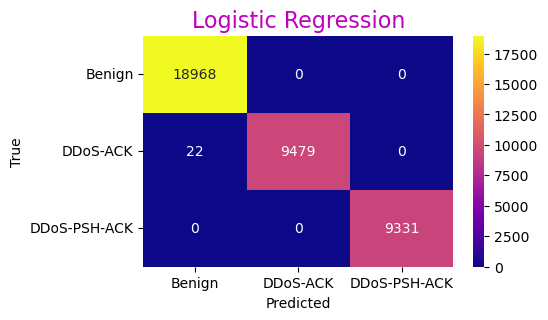

______________________________________________________________
_________________ Classification report for __________________
_________________ Logistic Regression ______________
______________________________________________________________
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     18968
    DDoS-ACK       1.00      1.00      1.00      9501
DDoS-PSH-ACK       1.00      1.00      1.00      9331

    accuracy                           1.00     37800
   macro avg       1.00      1.00      1.00     37800
weighted avg       1.00      1.00      1.00     37800

                         MLP Classifier 
Training Time: 1.241 Seconds
Training Time: 0.008 Seconds
Train Accuracy:  74.895
Test Accuracy:  75.315


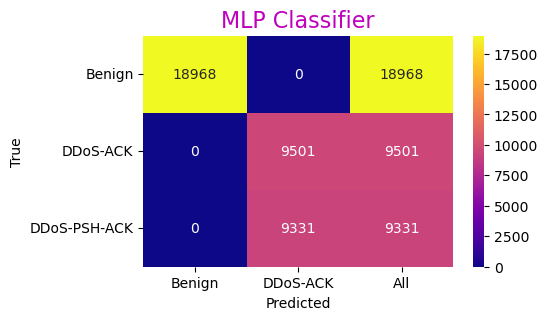

______________________________________________________________
_________________ Classification report for __________________
_________________ MLP Classifier ______________
______________________________________________________________
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     18968
    DDoS-ACK       0.50      1.00      0.67      9501
DDoS-PSH-ACK       0.00      0.00      0.00      9331

    accuracy                           0.75     37800
   macro avg       0.50      0.67      0.56     37800
weighted avg       0.63      0.75      0.67     37800

                         SVC 
Training Time: 0.704 Seconds
Training Time: 0.142 Seconds
Train Accuracy:  78.81700000000001
Test Accuracy:  78.738


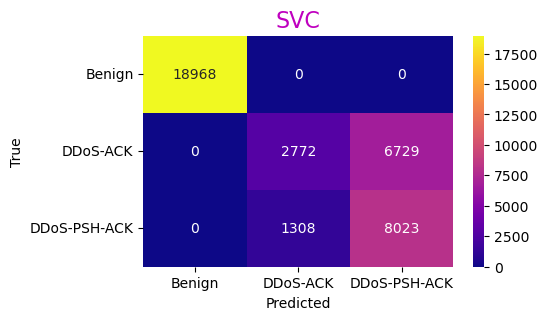

______________________________________________________________
_________________ Classification report for __________________
_________________ SVC ______________
______________________________________________________________
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     18968
    DDoS-ACK       0.68      0.29      0.41      9501
DDoS-PSH-ACK       0.54      0.86      0.67      9331

    accuracy                           0.79     37800
   macro avg       0.74      0.72      0.69     37800
weighted avg       0.81      0.79      0.77     37800



In [24]:
DDSResultData=[[],[],[],[],[],[]]
print("================================================================================================")
print("                        DDoS Intrusion Detection")
print("================================================================================================")

for i in range(len(ClfDDS)):
    print("                         {} ".format(Clfs[i]))
    print("================================================================================================")
    PrsClf = ClfDDS[i]   
    StartTime_1 = datetime.datetime.now() 
    PrsClf.fit(TrnDDSX, TrnDDSy)
    StartTime_2 = datetime.datetime.now()
    TimeDifference = StartTime_2 - StartTime_1
    TimeTrnSec=TimeDifference.total_seconds()
    print("Training Time: {} Seconds".format(round(TimeTrnSec,3)))
    StartTime_3 = datetime.datetime.now() 
    DDSPredTst=PrsClf.predict(TstDDSX)
    StartTime_4 = datetime.datetime.now()
    TimeDifference = StartTime_4 - StartTime_3
    TimeTstSec=TimeDifference.total_seconds()
    print("Training Time: {} Seconds".format(round(TimeTstSec,3)))
    AccDDSTst=metrics.accuracy_score(TstDDSy,DDSPredTst)
    print("Train Accuracy: ",round(PrsClf.score(TrnDDSX,TrnDDSy),5)*100)
    print("Test Accuracy: ",round(PrsClf.score(TstDDSX,TstDDSy),5)*100)
    DDSResultData[0].append(round(AccDDSTst,5)*100)
    DDSResultData[1].append(round(metrics.precision_score(TstDDSy,DDSPredTst,average="weighted"),5)*100)
    DDSResultData[2].append(round(metrics.recall_score(TstDDSy,DDSPredTst,average="weighted"),5)*100)
    DDSResultData[3].append(round(metrics.f1_score(TstDDSy,DDSPredTst,average="weighted"),5)*100)
    DDSResultData[4].append(round(TimeTstSec,3))
    DDSResultData[5].append(round(PrsClf.score(TrnDDSX,TrnDDSy),5)*100)
    print("================================================================================================")
    ConfMatVs(TstDDSy,DDSPredTst,Clfs[i])
    print("______________________________________________________________")
    print("_________________ Classification report for __________________")
    print("_________________ {} ______________".format(Clfs[i]))
    print("______________________________________________________________")
    print(metrics.classification_report(TstDDSy,DDSPredTst))
    print("================================================================================================")
DDoSDf=pd.DataFrame({
    "Models":Clfs,
    "Train_Accuracy":DDSResultData[5],
    "Test_Accuracy":DDSResultData[0],
    "Precision":DDSResultData[1],
    "Recall":DDSResultData[2],
    "F1-Score":DDSResultData[3],
    "Prediction_Time":DDSResultData[4]
})
DDoSDf=DDoSDf.sort_values(by="Test_Accuracy",ascending=False)
DDoSDf


for i in DDoSDf.columns.tolist()[2:]:
    figres = pxids.bar(DDoSDf, y=i, x="Models",
             text=i,color="Models",title="Comparison of {}".format(i),height=400,width=600)
    figres.show()

## CNN

In [37]:
def ResultVisualizer(ffanhs,md,strt,en,gprhknd,yax,eps):
    reshs=ffanhs.history
    fithst=pd.DataFrame({
        "Iteration":[i+1 for i in range(eps)],
        "Loss_Train":reshs['loss'],
        "Loss_Valid":reshs['val_loss'],
        "Accuracy_Train":reshs['accuracy'],
        "Accuracy_Valid":reshs['val_accuracy']
    })
    clscl=["#FF00FF","#0002FF"]
    fithst.iloc[:,strt:en].plot(kind=gprhknd,figsize=(6,3),color=clscl)
    vsap.title("{} Comparison ({})".format(yax,md),fontsize=17,color="m")
    vsap.xlabel("Epochs",fontsize=15,color="m")
    vsap.ylabel("{}".format(yax),fontsize=15,color="m")
    vsap.grid()
    vsap.show()

In [30]:
TrUn=TrnDDSy.unique()
TstUn=TstDDSy.unique()

print(TrnDDSy.unique())
print(TstDDSy.unique())
clss=TrnDDSy.unique().tolist()
TrnDDSyUN=TrnDDSy.replace(TrnDDSy.unique(),[x for x in range(len(TrnDDSy.unique()))])
TstDDSyUN=TstDDSy.replace(TstDDSy.unique(),[2,0,1])
print(TrnDDSyUN.unique())
print(TstDDSyUN.unique())

['Benign' 'DDoS-PSH-ACK' 'DDoS-ACK']
['DDoS-ACK' 'Benign' 'DDoS-PSH-ACK']
[0 1 2]
[2 0 1]


In [34]:
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(TrnDDSX)
x_test = scaler.transform(TstDDSX)

# Reshape data to fit into the Conv1D layer
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
DOSCNN = Sequential([
    Conv1D(1024, 1, activation='relu', input_shape=(14, 1)),
    MaxPooling1D(2),
    Conv1D(512, 1, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='sigmoid')
])

DOSCNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
DOSCNN.summary()
TrnTimeStrt = datetime.datetime.now() 
DOSCNN_Hist=DOSCNN.fit(x_train,TrnDDSyUN, epochs=10, validation_data=(x_test,TstDDSyUN))
TrnTimeEnd = datetime.datetime.now()
TrnTm = TrnTimeEnd - TrnTimeStrt
TrnTimeSecCNN=TrnTm.total_seconds()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 14, 1024)          2048      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 7, 1024)           0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 7, 512)            524800    
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 3, 512)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1536)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

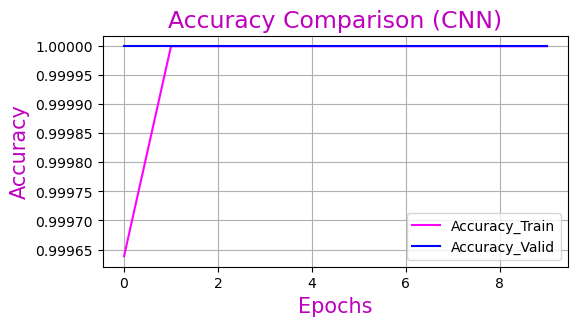

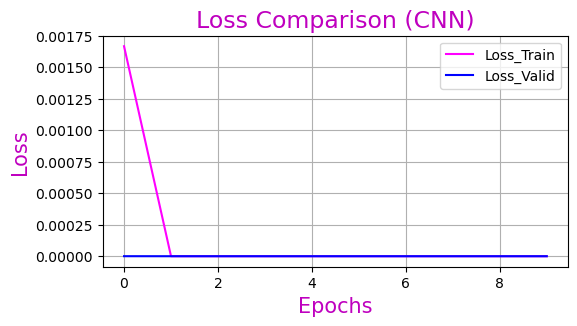

In [38]:
ResultVisualizer(DOSCNN_Hist,"CNN",3,5,'line','Accuracy',10)
ResultVisualizer(DOSCNN_Hist,"CNN",1,3,'line','Loss',10)

In [40]:
pred_train=DOSCNN.predict(x_train)
trnpred = pred_train.argmax(axis=1)
dftrn=pd.DataFrame({
        "Actual":TrnDDSyUN,
        "Predicted":trnpred
})
acctrcnn=metrics.accuracy_score(TrnDDSyUN,trnpred) 
AcrFinCNNTr=round(acctrcnn,4)*100
print("Training Accuracy for CNN: {}%".format(AcrFinCNNTr))

3544/3544 [==============================] - 13s 4ms/step
Training Accuracy for CNN: 100.0%


1182/1182 [==============================] - 4s 4ms/step
--------
Detected      0     1     2
Actual                     
0         18968     0     0
1             0  9331     0
2             0     0  9501
-----------


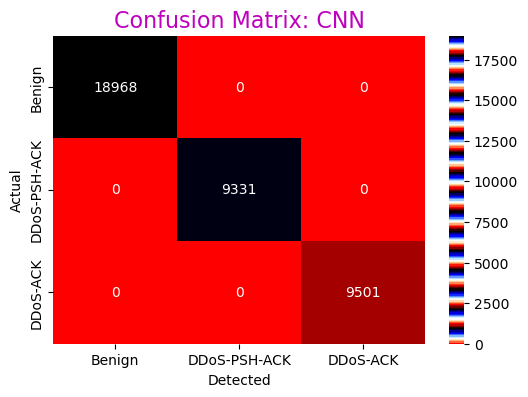

In [43]:
TstTimeStrt = datetime.datetime.now()
pred_test=DOSCNN.predict(x_test)
TstTimeEnd = datetime.datetime.now()
PrdTime = TstTimeEnd - TstTimeStrt
TstTimeSecCNN=PrdTime.total_seconds()
tstpred = pred_test.argmax(axis=1)
dftest=pd.DataFrame({
        "Actual":TstDDSyUN,
        "Predicted":tstpred
})
cnfcnn=pd.crosstab(TstDDSyUN,tstpred,rownames=['Actual'], colnames=['Detected'], margins=True)
cnfcnncls=cnfcnn.iloc[:3,:3]
print("--------\n{}\n-----------".format(cnfcnncls))
vsap.figure(figsize=(6,4))
vsap.title("Confusion Matrix: {}".format("CNN"), fontsize=16,color="m")
seaborn.heatmap(cnfcnncls,fmt="d",annot=True,cmap="flag",xticklabels=clss, yticklabels=clss)
vsap.show()

In [44]:
acr_cnn_test=metrics.accuracy_score(TstDDSyUN,tstpred) 
prec_cnn_test=metrics.precision_score(TstDDSyUN,tstpred,average='weighted')
recl_cnn_test=metrics.recall_score(TstDDSyUN,tstpred,average='weighted') 
f1s_cnn_test=metrics.f1_score(TstDDSyUN,tstpred,average='weighted') 
AcrFinCNN=round(acr_cnn_test,4)*100
PrcFinCNN=round(prec_cnn_test,4)*100
RclFinCNN=round(recl_cnn_test,4)*100
FsFinCNN=round(f1s_cnn_test,4)*100
print("Accuracy: {}%\nPrecision: {}%\nRecall: {}%\nF1-Score: {}%".format(AcrFinCNN,PrcFinCNN,RclFinCNN,FsFinCNN))

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-Score: 100.0%


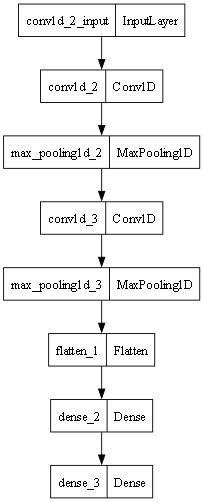

In [49]:
tensorflow.keras.utils.plot_model(
    DOSCNN,
    to_file="CNNModel.png",
    rankdir="TB",
    dpi=65
)

In [51]:
DDoSDfFinal=pd.DataFrame({
    "Models":Clfs+['CNN'],
    "Train_Accuracy":DDSResultData[5]+[AcrFinCNNTr],
    "Test_Accuracy":DDSResultData[0]+[AcrFinCNN],
    "Precision":DDSResultData[1]+[PrcFinCNN],
    "Recall":DDSResultData[2]+[RclFinCNN],
    "F1-Score":DDSResultData[3]+[FsFinCNN],
    "Prediction_Time":DDSResultData[4]+[TstTimeSecCNN]
})
DDoSDfFinal=DDoSDfFinal.sort_values(by='Test_Accuracy',ascending=False).reset_index(drop=True)
DDoSDfFinal

,Models,Train_Accuracy,Test_Accuracy,Precision,Recall,F1-Score,Prediction_Time
0,CNN,100.000,100.000,100.000,100.000,100.000,4.653696
1,Logistic Regression,99.922,99.942,99.942,99.942,99.942,0.005000
2,SVC,78.817,78.738,80.682,78.738,76.888,0.142000
3,MLP Classifier,74.895,75.315,62.861,75.315,67.037,0.008000
4,Random Forest,75.045,74.865,62.411,74.865,66.537,0.020000


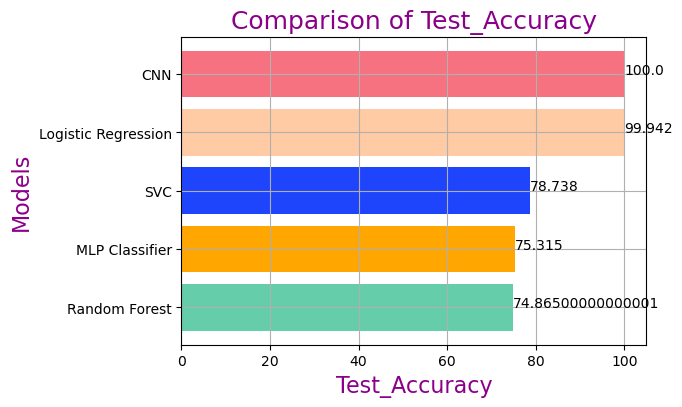

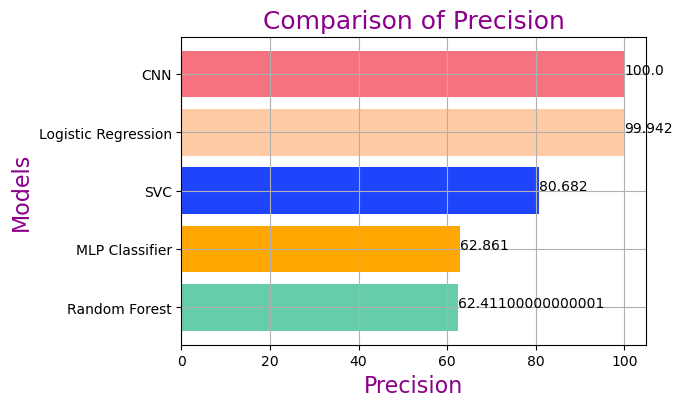

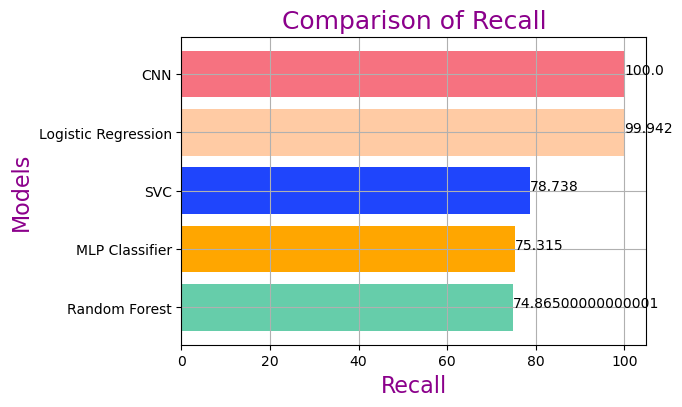

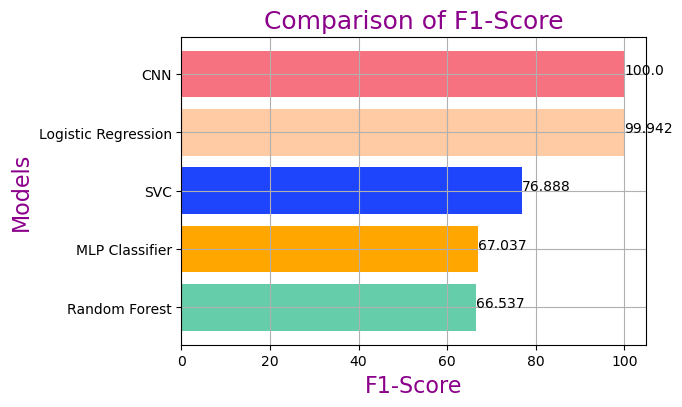

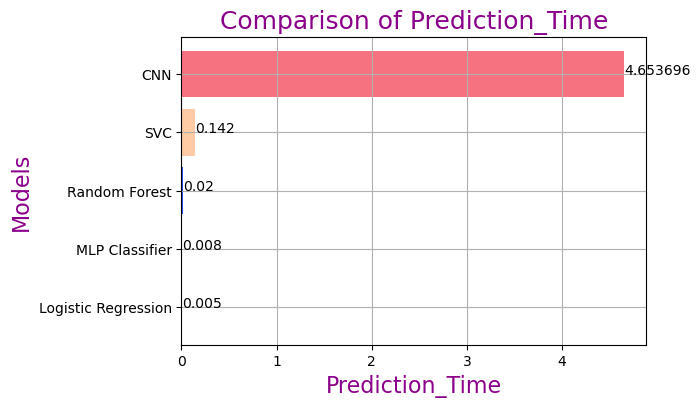

In [53]:
bc_colrs=["#66CDAA","#FFA600","#1F45FC","#FFCBA4","#F67280","#6A0DAD"]
for rh in DDoSDfFinal.columns.tolist()[2:]:
    DDoSDfFinal=DDoSDfFinal.sort_values(by=rh,ascending=True)
    vsap.figure(figsize=(6,4))
    vsap.title("Comparison of {}".format(rh),fontsize=18,color="#8B008B")
    vsap.barh(DDoSDfFinal['Models'],DDoSDfFinal[rh],color=bc_colrs)
    vsap.ylabel("Models",fontsize=16,color="#8B008B")
    vsap.xlabel("{}".format(rh),fontsize=16,color="#8B008B")
    for sr, val in enumerate(DDoSDfFinal["{}".format(rh)]):
        vsap.text(val, sr, str(val))
    vsap.grid()
    vsap.show() 